In [151]:
import numpy as np
import pickle
import pandas as pd
import sys
import plotly.express as px


sys.path.append('../src')
from datas import *


In [152]:
# evaluation_results = pickle.load(open('../eval/celebrity_steering_test_results.pkl', 'rb'))
evaluation_results = pickle.load(open('../eval/steering_test_results.pkl', 'rb'))

In [153]:
df = pd.DataFrame(evaluation_results)
df['label'] = [row.label for row in df['data_elt']]
df['out_len'] = [len(text) for text in df['output_text']]

df.head()

,process,vector_name,alpha,beta,clip_value,data_elt,output_text,nb_cliped_values,eval_text,steering_norm,steering_vect,projection_norm,projection_vect,number_gen_token,label,out_len
0,clipping_activation,proj+mean+inv_test_PCAProjectionModel,-100,0.0,0.0,"celebrity(label=0, user_prompt='Is {} a prime ...",No,4096,Error,0.0,"[0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0....",0.823413,"[-0.7498294613112721, 0.15452514931091466, 0.2...",1,0,2
1,clipping_activation,proj+mean+inv_test_PCAProjectionModel,-100,0.0,0.1,"celebrity(label=0, user_prompt='Is {} a prime ...",No,4096,Error,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0...",0.823413,"[-0.7498294613112721, 0.15452514931091466, 0.2...",1,0,2
2,clipping_activation,proj+mean+inv_test_PCAProjectionModel,-100,0.0,0.4,"celebrity(label=0, user_prompt='Is {} a prime ...",No,4096,Error,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0...",0.823413,"[-0.7498294613112721, 0.15452514931091466, 0.2...",1,0,2
3,clipping_activation,proj+mean+inv_test_PCAProjectionModel,-100,0.0,0.9,"celebrity(label=0, user_prompt='Is {} a prime ...",No,4096,Error,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0,...",0.823413,"[-0.7498294613112721, 0.15452514931091466, 0.2...",1,0,2
4,clipping_activation,proj+mean+inv_test_PCAProjectionModel,-100,0.0,1.6,"celebrity(label=0, user_prompt='Is {} a prime ...",No,4096,Error,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0,...",0.823413,"[-0.7498294613112721, 0.15452514931091466, 0.2...",1,0,2


In [154]:
# Check the evaluation portions
print(df["eval_text"].value_counts())
print("Total number of gens:", len(df))

eval_text
Error    1800
Name: count, dtype: int64
Total number of gens: 1800


In [185]:
negative_eval = ["No", "No.", "no", "no.", "No!", " no"]
positive_eval = ["Yes", "Yes.", " Yes", "yes", "yes.", "Yes!"]
invalid_eval = ["Invalid"]
error_eval = ["Error"]
# df['eval_label'] = [(text in negative_eval) + 2*(text in positive_eval) + 3*(text in invalid_eval) + 4*(text in error_eval)  for text in df['eval_text']]

# ONLY IF YOU DON'T HAVE THE EVAL THINGYY
df['eval_text'] = df['output_text']

df.loc[df['eval_text'].isin(positive_eval), 'eval_label'] = "Primary"
df.loc[df['eval_text'].isin(negative_eval), 'eval_label'] = "Not Primary"
df.loc[~df['eval_text'].isin(negative_eval+positive_eval), 'eval_label'] = "Disrupted"


In [187]:
np.array(df[df["eval_label"]=="Disrupted"]["output_text"])

array(['bunging', 'obble or', ' Iming', 'brse', ' ( no', '.sdng',
       '.soundng', ' Klingerd', 'uzzyinge', ' Sog', ' no-', '-no.',
       ' dialectuess', 'urchúng', 'urcherd', 'erdurch', 'erdul', ' no-',
       ' no.', 'USTERuess', 'nguess', 'σχerd', 'erderd', 'keerd',
       ' probably weird', " wasn't", '. to', 'Noo', 'USTER乙',
       'USTERUSTER', 'USTERuess', 'erdrys', 'σχσχ', 'erdö', ' wasn wasn',
       ' because.', 'falseo', 'not-', 'I didn', ' Birthday ', 'Primary ',
       '## ', '### \n\n', ' Birthday ', '生\n', ' \n', ' �\n', '   ',
       'ogi\n', 'iterePrimary', 'Birth Dependency', 'osten birth',
       'antzenders', '\n\n', '\n\n', 'onda\n', 'gregenders', 'cakansi',
       'ogglerCED', 'enders aggreg', 'endersenders', '\n\n', '\n and',
       '\n baiser', '否 (', 'fovault', 'Humans PureComponent',
       '_redirectedACKET', ' suifov', 'endersenders', '\n\n', ' and\n',
       '\n\n', ' countries countries', ' or and', 'Sounding', 'Pron',
       'brng', 'brong', ' sounding

In [188]:
print(df["nb_cliped_values"].value_counts())

nb_cliped_values
4096    756
4095    144
0       108
4092     72
4094     72
1086     36
272      36
3935     36
3364     36
2244     36
4056     36
4086     36
4078     36
3866     36
4080     36
274      36
1081     36
2260     36
3368     36
3940     36
4057     36
4076     36
4087     36
Name: count, dtype: int64


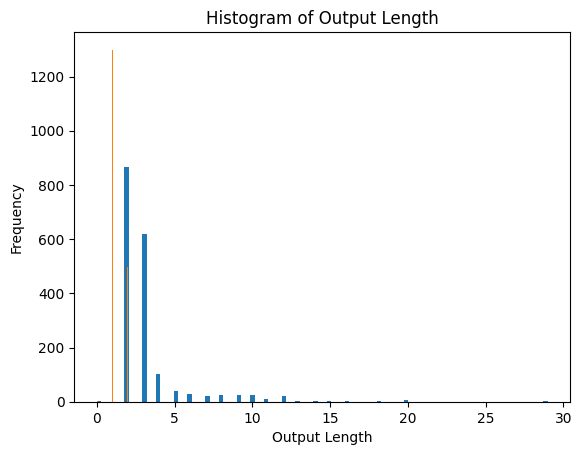

In [189]:
# print(df["out_len"].value_counts())
import matplotlib.pyplot as plt

plt.hist(df['out_len'], bins=100)
plt.hist(df['number_gen_token'], bins=32)
plt.xlabel('Output Length')
plt.ylabel('Frequency')
plt.title('Histogram of Output Length')
plt.show()

In [190]:
# Count the number of errors
print(len(df[df["output_text"]=="Error"]))
print(len(df[df["eval_text"]=="Error"]))


0
0


In [191]:
df_short = df[df["output_text"].map(len)< 1000]
negative_short_df = df_short[df_short["eval_text"].isin(negative_eval)]

print(negative_short_df["label"].value_counts())

print(negative_short_df["alpha"].value_counts())
print(negative_short_df["beta"].value_counts())
print(negative_short_df["clip_value"].value_counts())
print(negative_short_df["vector_name"].value_counts())

label
1    518
0    458
Name: count, dtype: int64
alpha
 0      399
-100    346
 100    231
Name: count, dtype: int64
beta
0.04    131
0.01    126
0.00    121
0.09    121
0.16    102
0.25     88
0.36     83
0.49     72
0.64     68
0.81     64
Name: count, dtype: int64
clip_value
14.4    90
19.6    84
10.0    79
16.9    77
8.1     74
12.1    72
6.4     71
4.9     64
3.6     62
1.6     57
2.5     56
0.4     49
0.9     48
0.1     47
0.0     46
Name: count, dtype: int64
vector_name
proj+mean+inv_test_PCAProjectionModel    976
Name: count, dtype: int64


In [192]:
print(df[df['beta'] == 5]["output_text"].map(len).mean())
print(df[df['beta'] == 2]["output_text"].map(len).mean())
print(df[df['beta'] == 1]["output_text"].map(len).mean())

nan
nan
nan


In [193]:
negative_results = df[df["eval_text"].isin(negative_outs)][df["label"] == 0]
print("Number of ruthly sorted negative results", len(negative_short_df))
print(negative_short_df["output_text"])

NameError: name 'negative_outs' is not defined

In [194]:
negative_results["alpha"].value_counts()
negative_results["beta"].value_counts()

NameError: name 'negative_results' is not defined

In [196]:
df['extract_text'] = df['output_text'].apply(lambda x: x[:50])
df['max_reached'] = df['number_gen_token'].apply(lambda x: x==102)
df['index'] = df.index
df['input_text'] = df['data_elt'].apply(lambda x: x.input_text)



# df['eval_label'] = df['eval_label'].astype(bool)
df['noise'] = [np.random.rand() for _ in range(len(df))]

ddf = df[df['clip_value'] > -1]

fig = px.scatter(ddf, x='steering_norm', y='nb_cliped_values', size="beta", color='eval_label', 
        hover_data=['input_text', "nb_cliped_values", 'eval_text', "extract_text", "index", "label"], opacity=0.3, symbol='label')



fig.update_layout(
    title='Influence Cliping on the Norm and Disruption',
    xaxis_title='steering_norm',
    yaxis_title='nb_cliped_values',
    width=800, height=600
)
fig.show()


In [ ]:
print("\n This is just for inspection: \n")
print(np.array(df[df["index"].isin([2])]["output_text"]))


 This is just for inspection: 

['I\'m happy to help you with that!\n\nAccording to my calculations, 3083 is indeed a prime number. It\'s a prime number because it can only be divided by itself and "1", which means it\'s not divisible by any other number except for those two.']


In [ ]:
# Miss classification for the "Thibaud1" data
# miss_classified_2no = [21, 28,35,15,16,17,22,18,23,13,20, 40]
# miss_classified_2yes = [34]
# miss_classified_2invalid = [8, 70, 58, 64, 68, 10, 11, 12, 7, 69, 9]

# Miss classified for the prime numbers
miss_classified_2no = [10, 8]
miss_classified_2invalid = [20]
miss_classified_2yes = []



print("This should be Negative results: \n")
print(np.array(df[df["index"].isin(miss_classified_2no)]["output_text"]))

print("\n This should be Invalid results: \n")
print(np.array(df[df["index"].isin(miss_classified_2invalid)]["output_text"]))

This should be Negative results: 

['No, 3087 is not a prime number. It can be factored as 3 × 1029, which means it has more than two factors.'
 'No, 3087 is not a prime number. It can be divided by 3 and 1031, so it is a composite number.']

 This should be Invalid results: 

['I think I can help you with that!\n\nNo, 3087 is not a prime number. It\'s actually a composite number. The word "3087" is broken down into the sounds "3087" which means it\'s a composite number.'
 'No, 3087 is not a prime number. It can be factored as 3 × 1029, which means it has more than two factors.'
 'No, 3087 is not a prime number. It can be factored as 3 × 1029, which means it has more than two distinct factors.'
 'No, 3087 is not a prime number. It can be divided by 3 and 1031, so it is a composite number.'
 'The number 3087 can be factored as 3 × 3 × 343, which means it is not a prime number.'
 'The number 3087 can be divided by several numbers, including 3, 9, 343, and 1, among others. Therefore, 3087

In [132]:
# Change the eval text for cleaner results:
df.loc[df["index"].isin(miss_classified_2no), "eval_text"] = "No"
df.loc[df["index"].isin(miss_classified_2yes), "eval_text"] = "Yes"
df.loc[df["index"].isin(miss_classified_2invalid), "eval_text"] = "invalid"


KeyError: 'index'

In [ ]:
df["alpha_amnt"] = [0.1+np.abs(alpha)/500 for alpha in df["alpha"]]

fig = px.scatter(df, x='nb_cliped_values', y='steering_norm', size='alpha_amnt', color='eval_text', 
hover_data=['eval_text', "extract_text", "index"], opacity=0.5)
fig.update_layout(
    title='Steering Norm vs nb_cliped_values and abs(Alpha)',
    xaxis_title='nb_cliped_values',
    yaxis_title='steering_norm',
    width=800, height=600
)
fig.show()